'Before Filtering the shape (523906, 59)'

'After Filter the shape (28210, 59)'

'Desire Filter shape (28210, 41)'

Schema([('Online_Clothing', Int16),
        ('Online_Footwear', Int16),
        ('Online_Furniture', Int16),
        ('Online_Mobile', Int16),
        ('Online_PersonalGoods', Int16),
        ('Online_RecreationGoods', Int16),
        ('Online_HouseholdAppliances', Int16),
        ('Online_Crockery', Int16),
        ('Online_SportsGoods', Int16),
        ('Online_MedicalEquipment', Int16),
        ('Online_Bedding', Int16),
        ('Free_Laptop', Int16),
        ('Num_Free_Laptop', Int16),
        ('Free_Tablet', Int16),
        ('Num_Free_Tablet', Int16),
        ('Free_Mobile', Int16),
        ('Num_Free_Mobile', Int16),
        ('Free_Bicycle', Int16),
        ('Num_Free_Bicycle', Int16),
        ('Free_Scooter', Int16),
        ('Num_Free_Scooter', Int16),
        ('Free_Clothing', Int16),
        ('Num_Free_Clothing', Int16),
        ('Free_Footwear', Int16),
        ('Num_Free_Footwear', Int16),
        ('Free_Other', Int16),
        ('Num_Free_Other', Int16),
        ('Possess_

Percentage of null values 
Online_Clothing ---> 84.40%
Online_Footwear ---> 89.24%
Online_Furniture ---> 99.95%
Online_Mobile ---> 99.14%
Online_PersonalGoods ---> 97.80%
Online_RecreationGoods ---> 99.74%
Online_HouseholdAppliances ---> 99.75%
Online_Crockery ---> 99.64%
Online_SportsGoods ---> 99.35%
Online_MedicalEquipment ---> 99.90%
Online_Bedding ---> 98.89%
Free_Laptop ---> 100.00%
Num_Free_Laptop ---> 100.00%
Free_Tablet ---> 99.99%
Num_Free_Tablet ---> 99.99%
Free_Mobile ---> 99.99%
Num_Free_Mobile ---> 99.99%
Free_Bicycle ---> 99.65%
Num_Free_Bicycle ---> 99.65%
Free_Scooter ---> 99.99%
Num_Free_Scooter ---> 99.99%
Free_Clothing ---> 94.00%
Num_Free_Clothing ---> 94.00%
Free_Footwear ---> 99.75%
Num_Free_Footwear ---> 99.75%
Free_Other ---> 97.73%
Num_Free_Other ---> 97.73%
Possess_Television ---> 26.37%
Possess_Radio ---> 99.16%
Possess_Laptop ---> 94.42%
Possess_Mobile ---> 2.36%
Possess_Bicycle ---> 58.59%
Possess_Scooter ---> 24.40%
Possess_Car ---> 93.61%
Possess_Truck -

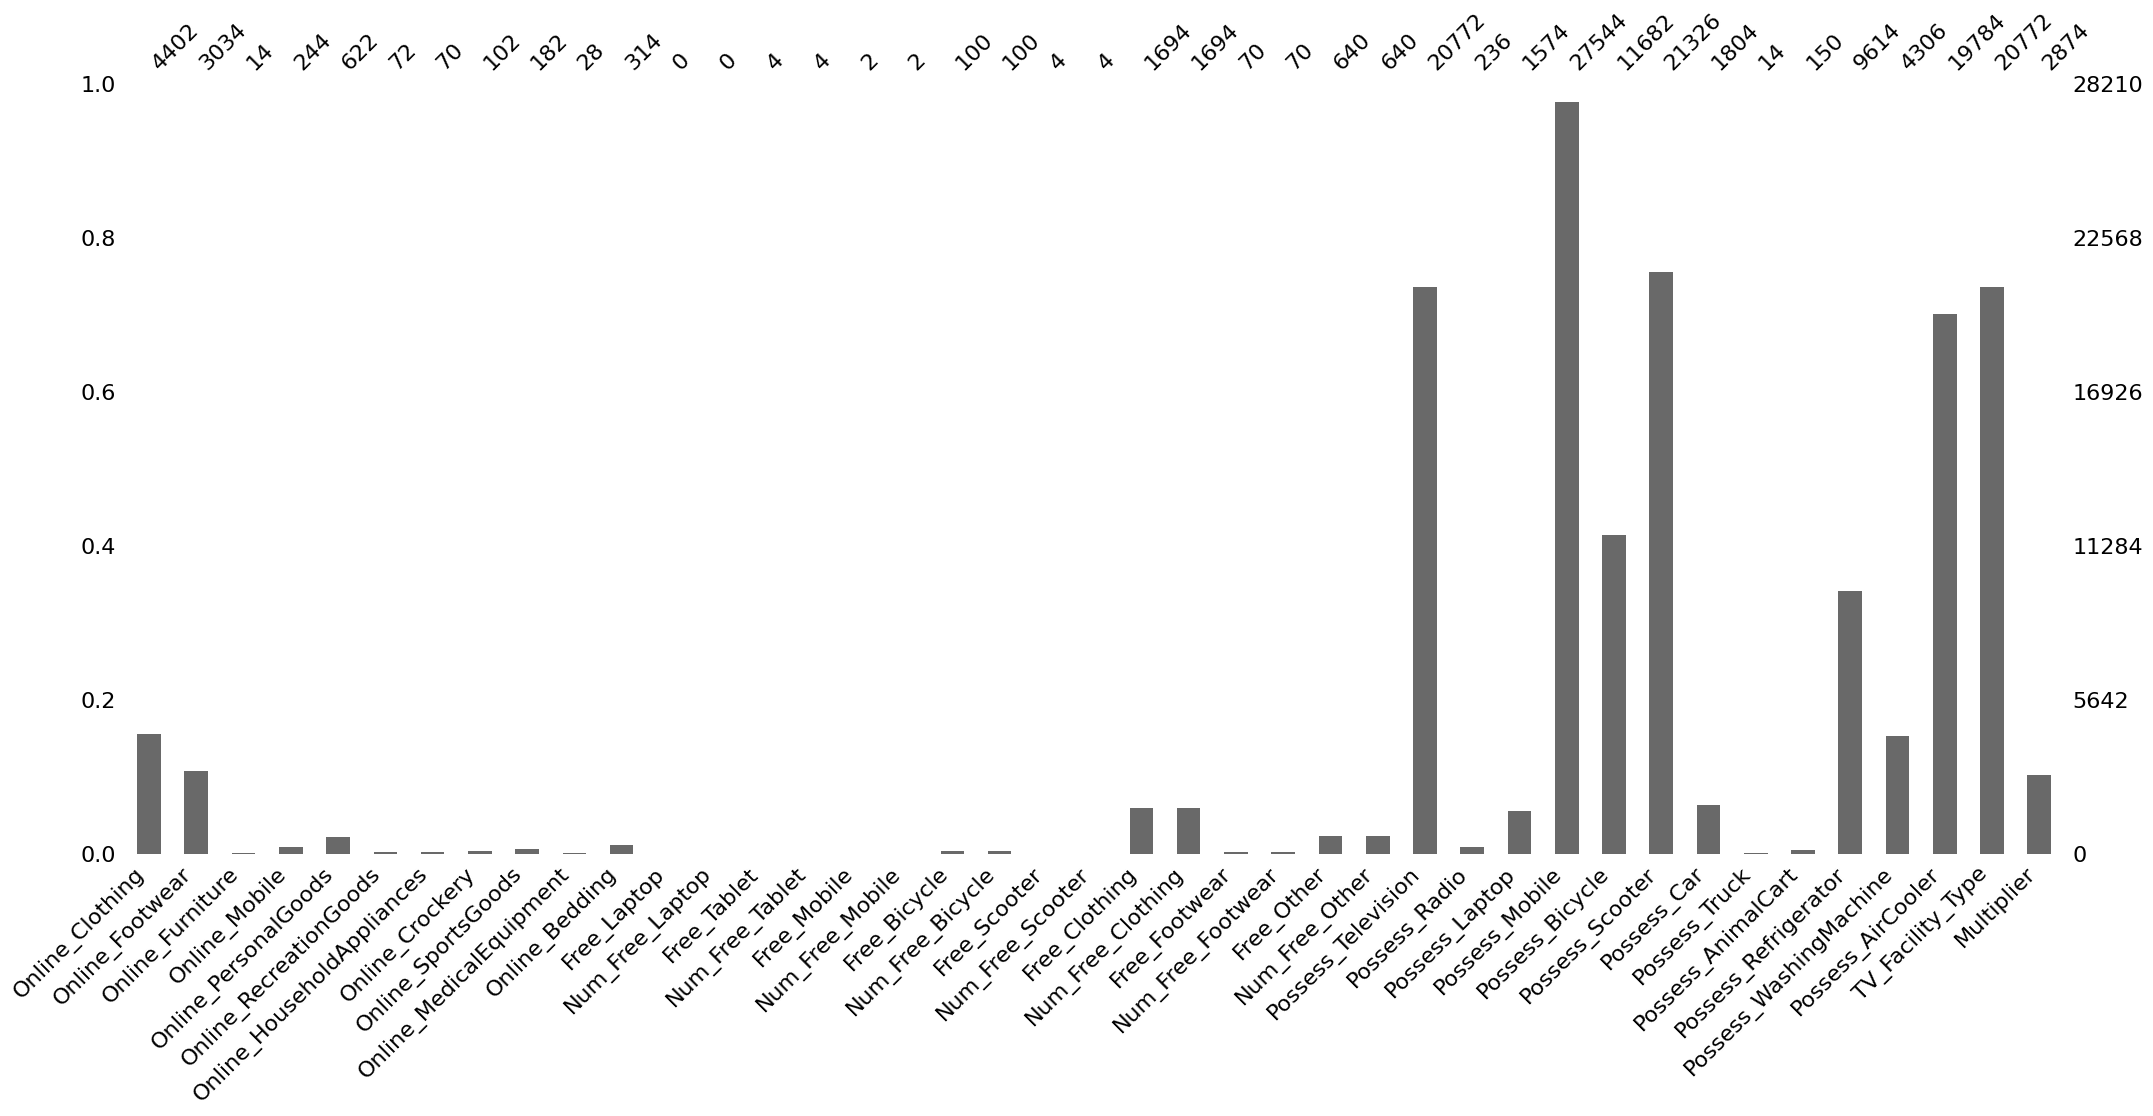

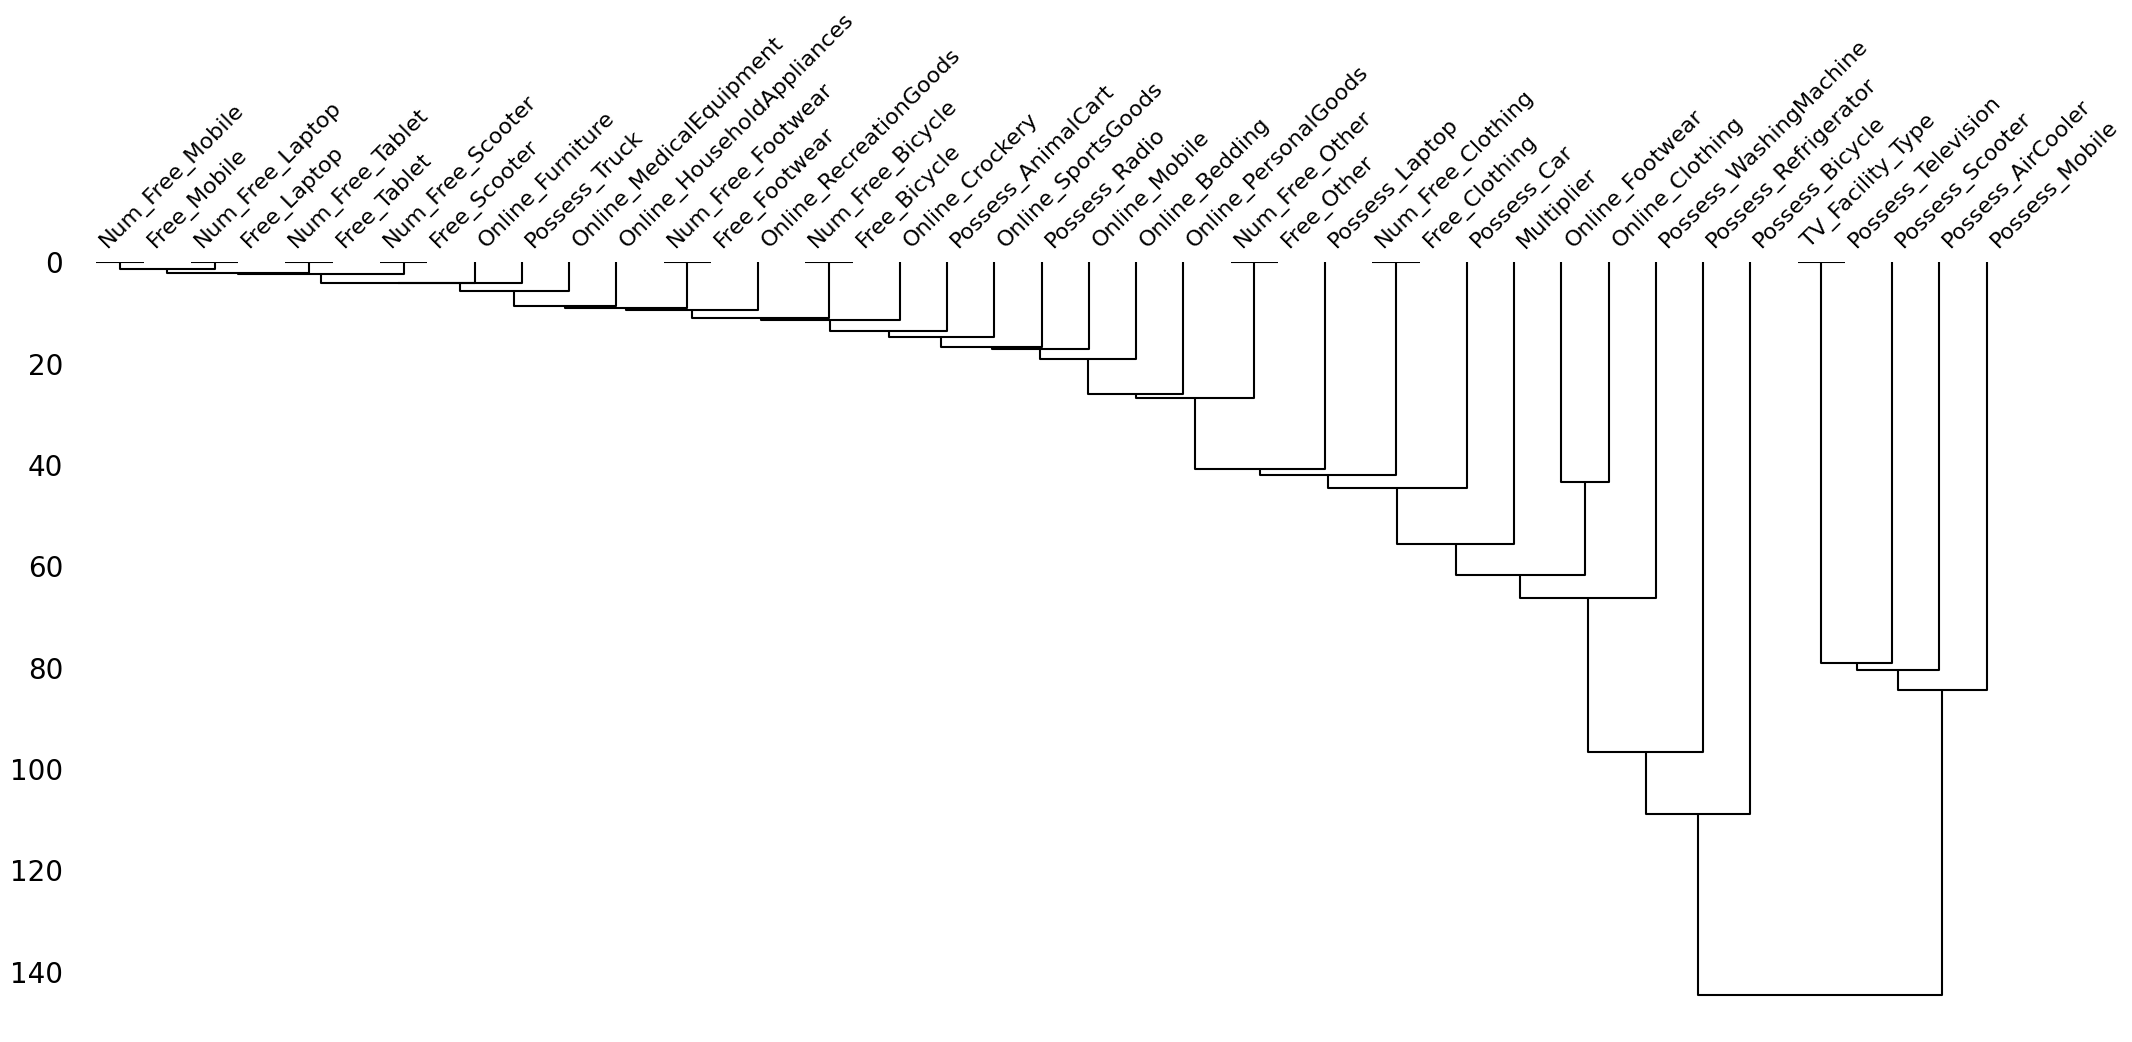

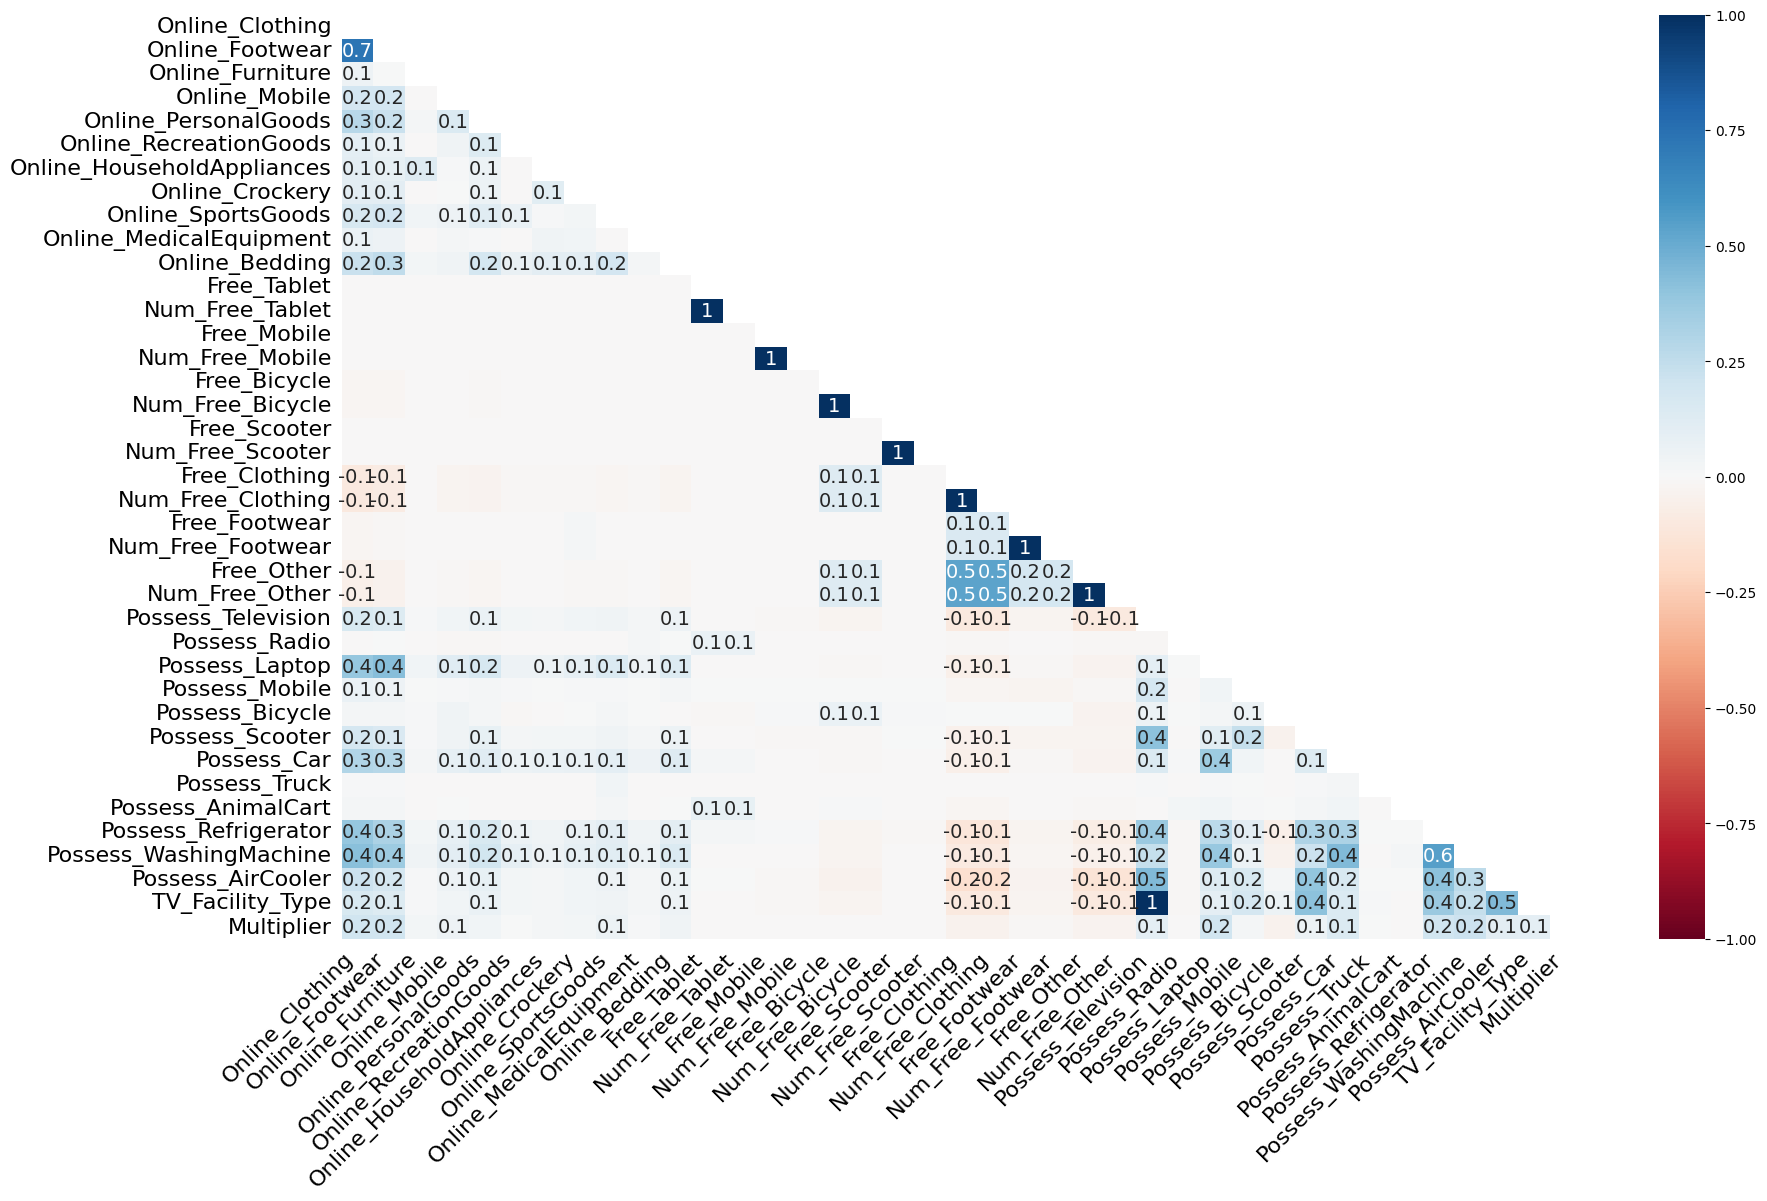

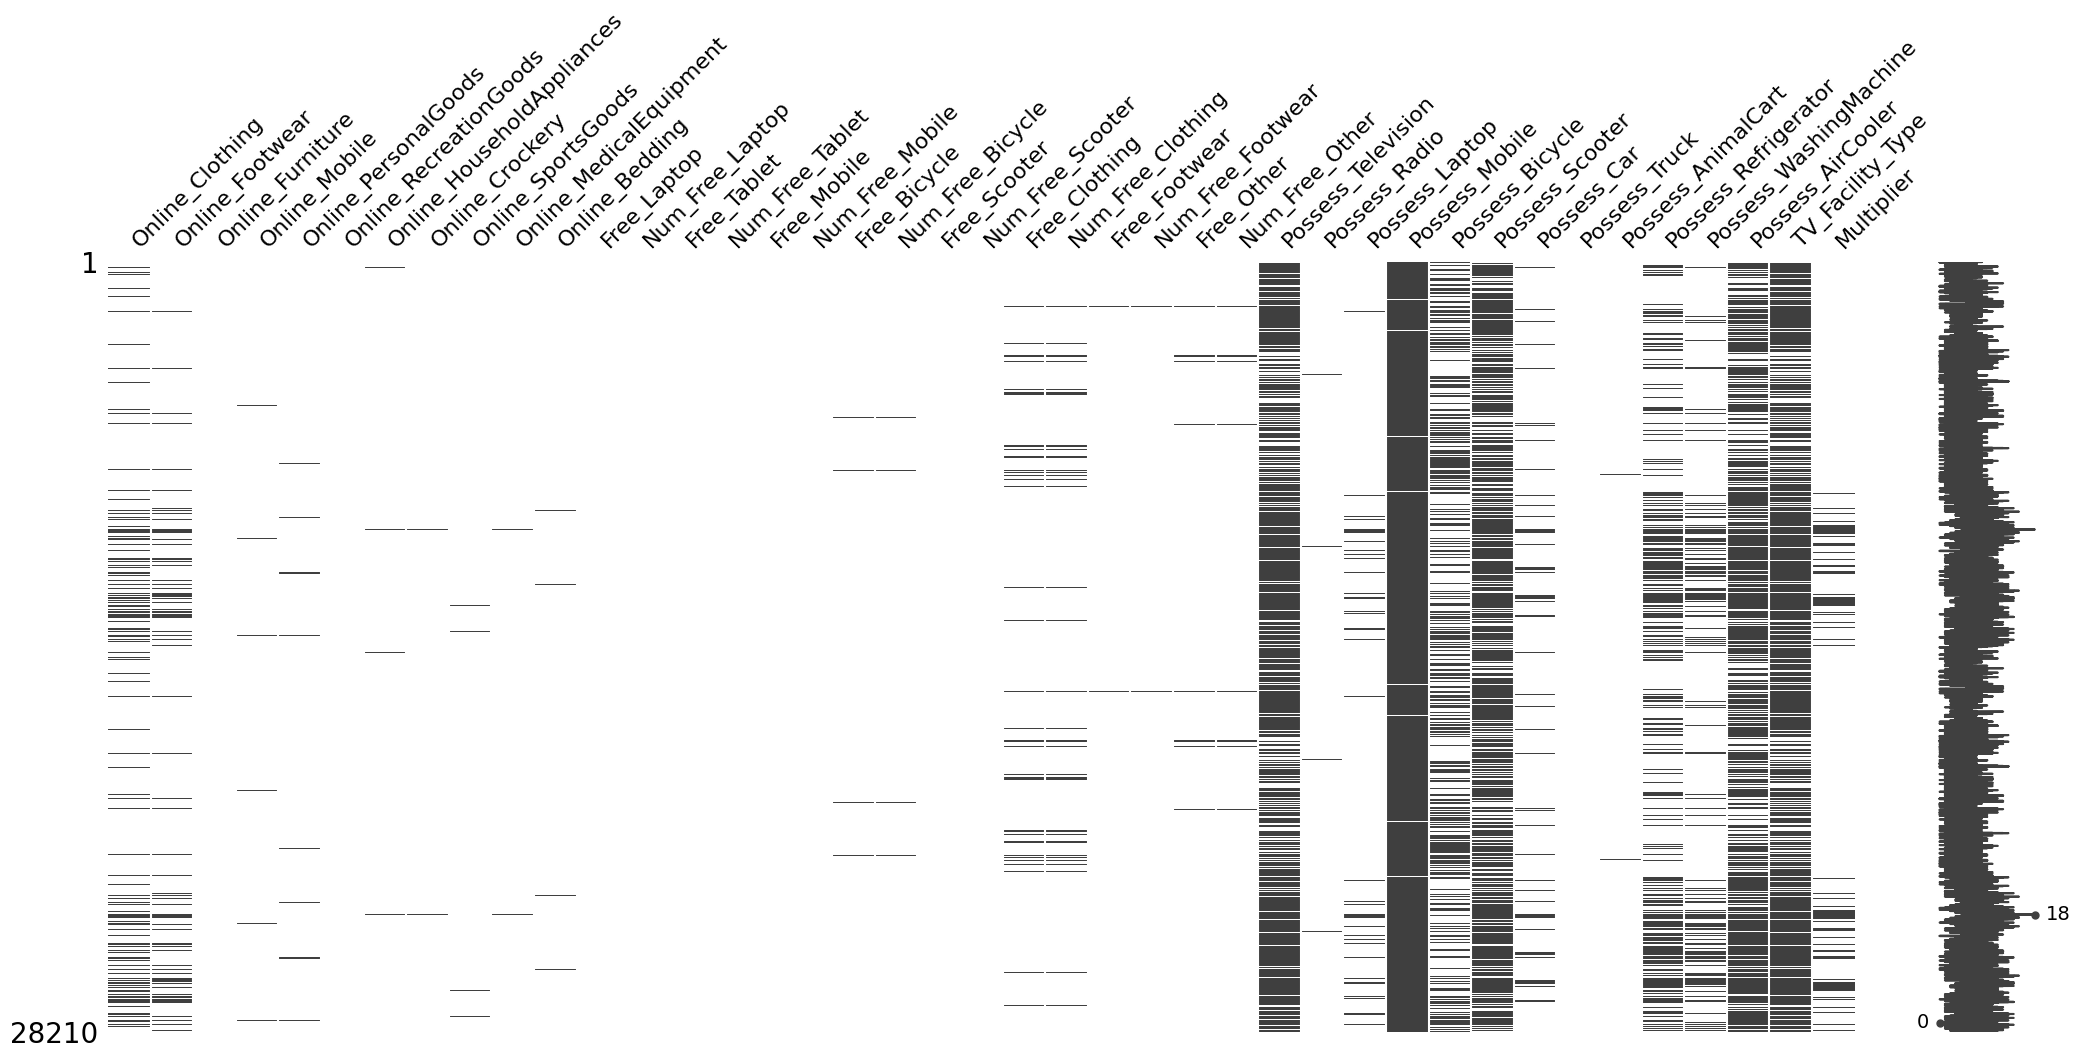

In [1]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-11\data\lev-11_merged.parquet"

# import 
import pandas as pd
import polars as pl
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

# Functions define for plot null
def plot_null(df: pd.DataFrame):
    msgo.bar(df)
    msgo.dendrogram(df)
    msgo.heatmap(df)
    msgo.matrix(df)

# Import Data and filter
pdf = pl.read_parquet(path)
display(f"Before Filtering the shape {pdf.shape}")
pdf = pdf.filter(
    pl.col('State') == '23'
)
display(f"After Filter the shape {pdf.shape}")

# ------------------------ Our useful variables are 
# ===============================

cols = [
'Online_Clothing',
'Online_Footwear',
'Online_Furniture',
'Online_Mobile',
'Online_PersonalGoods',
'Online_RecreationGoods',
'Online_HouseholdAppliances',
'Online_Crockery',
'Online_SportsGoods',
'Online_MedicalEquipment',
'Online_Bedding',
'Free_Laptop',
'Num_Free_Laptop',
'Free_Tablet',
'Num_Free_Tablet',
'Free_Mobile',
'Num_Free_Mobile',
'Free_Bicycle',
'Num_Free_Bicycle',
'Free_Scooter',
'Num_Free_Scooter',
'Free_Clothing',
'Num_Free_Clothing',
'Free_Footwear',
'Num_Free_Footwear',
'Free_Other',
'Num_Free_Other',
'Possess_Television',
'Possess_Radio',
'Possess_Laptop',
'Possess_Mobile',
'Possess_Bicycle',
'Possess_Scooter',
'Possess_Car',
'Possess_Truck',
'Possess_AnimalCart',
'Possess_Refrigerator',
'Possess_WashingMachine',
'Possess_AirCooler',
'TV_Facility_Type',
'Multiplier',
]

pdf = pdf[cols]

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

display(pdf.schema)

# MP Data
mp_df = pdf.to_pandas()

print("Percentage of null values ")
for col in mp_df.columns:
    null_percentage = (mp_df[col].isnull().sum() / mp_df.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")
    
plot_null(mp_df)